In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('cces_example_data.csv')
df.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [7]:
df.shape

(659, 21)

In [8]:
df['pid3']

0      1
1      1
2      2
3      1
4      1
      ..
654    1
655    1
656    1
657    2
658    2
Name: pid3, Length: 659, dtype: int64

In [9]:
df['sex']

0      2
1      2
2      1
3      1
4      2
      ..
654    2
655    1
656    1
657    1
658    1
Name: sex, Length: 659, dtype: int64

In [10]:
df['pid3_c'] = df['pid3'].astype('category')

In [11]:
df['sex_c'] = df['sex'].astype('category')

In [12]:
df['pid3_c'].value_counts()

pid3_c
1    251
3    236
2    172
Name: count, dtype: int64

In [13]:
df['sex_c'].value_counts()

sex_c
2    369
1    290
Name: count, dtype: int64

In [14]:
pid3_map = {1: 'Democratic', 2: 'Republican', 3: 'Independent'}
sex_map = {1: 'Male', 2: 'Female'}

In [17]:
df['pid3_c'] = df['pid3_c'].cat.rename_categories(pid3_map)

In [18]:
df['sex_c'] = df['sex_c'].cat.rename_categories(sex_map)

In [20]:
df['sex_c'].value_counts()

# If you know data is going to be categorical, go through this process to change to categorical

sex_c
Female    369
Male      290
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

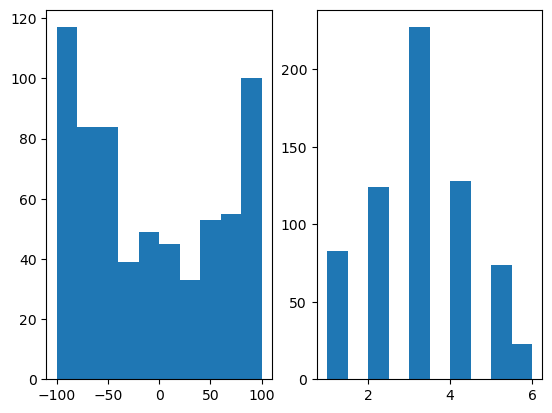

In [22]:
fig1, axs1 = plt.subplots(1, 2)
axs1[0].hist(df['InterGBiasParty'])
axs1[1].hist(df['ideo5'])

plt.show

In [23]:
df['ideo5'].value_counts()

ideo5
3    227
4    128
2    124
1     83
5     74
6     23
Name: count, dtype: int64

In [25]:
df_fixed = df[df['ideo5'] != 6]

In [26]:
df_fixed.shape

(636, 23)

In [28]:
model1 = smf.ols("InterGBiasParty ~ ideo5", data = df_fixed)

In [31]:
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        InterGBiasParty   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     579.1
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.14e-91
Time:                        19:46:29   Log-Likelihood:                -3369.9
No. Observations:                 636   AIC:                             6744.
Df Residuals:                     634   BIC:                             6753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -125.2957      5.234    -23.939      0.000    -135.573    -115.018
ideo5         39.3363      1.635     24.064      0.000      36.126      42.546
==============================================================================
Omnibus:                        2.233   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                2.265
Skew:                          -0.143   Prob(JB):                        0.322
Kurtosis:                       2.942   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

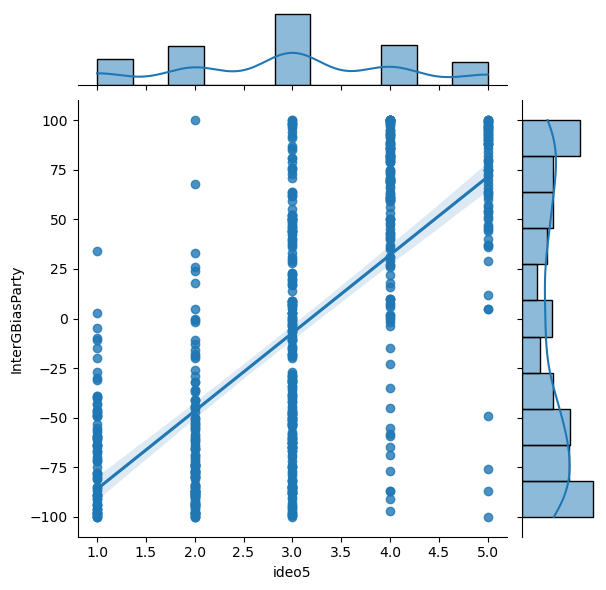

In [34]:
sns.jointplot(kind = 'reg', data = df_fixed,
              x = 'ideo5', y = 'InterGBiasParty')
plt.show()

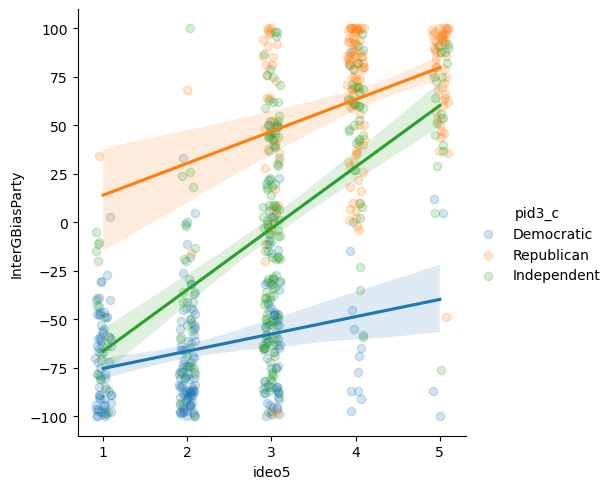

In [39]:
sns.lmplot(data = df_fixed, x = 'ideo5',
            y = 'InterGBiasParty',
            hue = 'pid3_c', x_jitter = .1,
            scatter_kws = {'alpha': .2})
plt.show()